# Averaging ERPs: Creating MNE Evoked objects

Since averaging across trials is typically the end goal of an ERP experiment, MNE has a distinct class, `Evoked`, for ERP data where multiple trials have been averaged for each experimental condition or trial type. 

We'll first import MNE and the mastoid-referenced, cleaned epochs we saved in the previous step. 

~~~python
import mne
mne.set_log_level('error')  # reduce extraneous MNE output

# Participant ID code
p_id = 'N400_dataset_14'
data_dir = 'data'

epochs_mastoidref = mne.read_epochs(data_dir + '/' + p_id + '-mstd-epo.fif', preload=True)
~~~

In [1]:
# followed the textbook because I have the related data only
import mne 
mne.set_log_level("error")

p_id = "sub-001"
data_dir = "data/" + p_id + "/"

epochs = mne.read_epochs(data_dir + p_id + "-epo.fif", preload=True).set_montage("easycap-M1")

## Create Evoked objects

Unlike `Epochs`, which by definition contain multiple trials and in which each trial has an associated condition label (event code), `Evoked` data sets are averages across trials for a *single* condition. Thus we have to create a separate `Evoked` object for each condition in our experiment. For convenience, we can store these in a list, and we can created the list of Evoked objects using dictionary comprehension, so that each dictionary key is the condition name and its value is the Evoked object:

~~~python
conditions = ['Match', 'Mismatch']
evokeds = {c:epochs_mastoidref[c].average() for c in conditions}
evokeds    
~~~

In [2]:
conditions = ["Match", "Mismatch"]

evokeds = {c:epochs[c].average() for c in conditions}

evokeds

{'Match': <Evoked | '0.25 × Match/A + 0.25 × Match/C + 0.25 × Match/B + 0.25 × Match/D' (average, N=72), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~94 kB>,
 'Mismatch': <Evoked | '0.25 × Mismatch/A + 0.24 × Mismatch/C + 0.25 × Mismatch/B + 0.25 × Mismatch/D' (average, N=71), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~94 kB>}

## Plot average ERP for each condition

We can use a method called `plot_joint()` to generate a combination of "butterfly" plots (waveforms of all electrodes overlaid) and topographic maps at specific time points that we specify. This is a nice way of relating scalp topographies and waveforms. The time points specified for the topo plots were selected based on early peaks apparent in the waveforms above, and then on 200 ms intervals over the time period when the N400 is expected:

~~~python
times = [.150, .250, .400, .600, .800]
for c in evokeds.keys():
    evokeds[c].plot_joint(times=times, title=c);
~~~

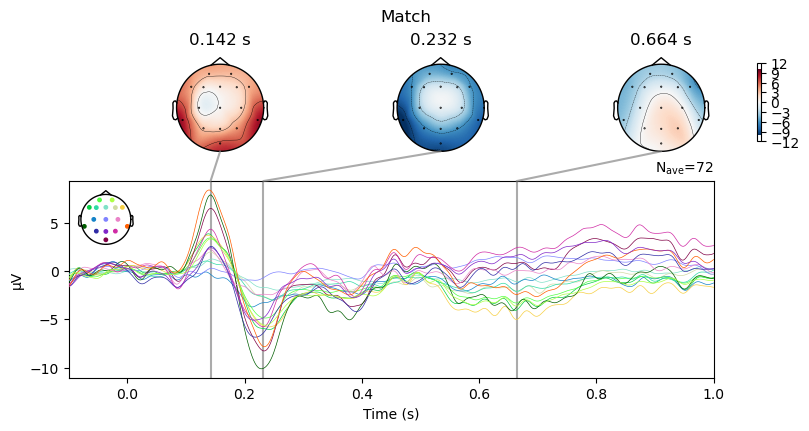

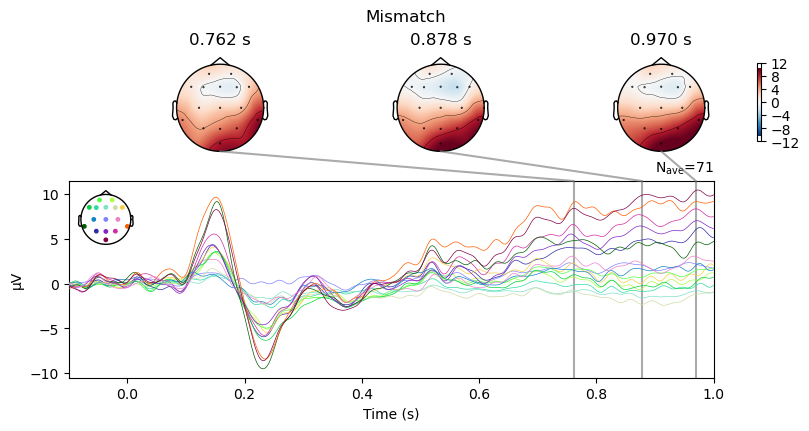

In [3]:
for c in evokeds.keys():
    evokeds[c].plot_joint(title=c)

## Examine contrasts between conditions

Viewing the ERPs for each experimental condition is a good first step, but ultimately any ERP experiment should be designed around *contrasts* between different conditions. In the present study, we are interested in the difference between match and mismatch items. We predicted an N400 component, which would be larger (more negative) for mismatch than match items. The N400 tends to be largest over the midline centre/posterior region of the scalp (when using averaged-mastoid reference). So here we will plot the data at electrode Cz, which typically shows the N400 effect. We use the function `mne.viz.plot_compare_evokeds()`, which plots waveforms for each of a list of evoked items that you pass to it:

~~~python
mne.viz.plot_compare_evokeds(evokeds, 
                             picks='Cz');
~~~

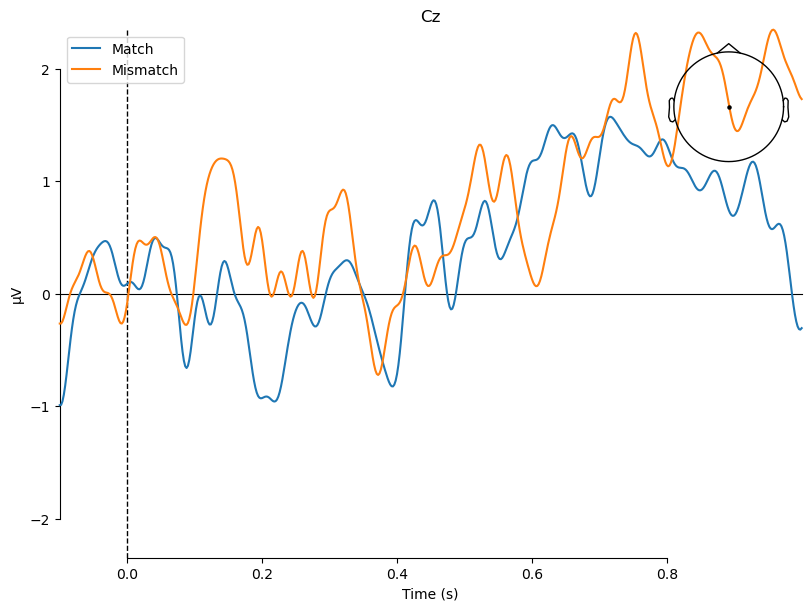

In [4]:
mne.viz.plot_compare_evokeds(evokeds, picks="Cz");

We can make this plot a bit nicer by adding a few things to it:
- firstly we define a *region of interest* (ROI) that includes a set of electrodes where the N400 is expected, so that we can plot the ERP waveform averaged over these electrodes
- we add the `combine` kwarg to tell MNE how to combine the data from these electrodes
- we define dictionaries mapping condition names to colours and linestyles for out plot, to make the two conditions' lines more distinctive
- we tell MNE where to put the legend and plot of the sensor locations, to ensure these don't overlap with the waveforms

~~~python
roi = ['C3', 'Cz', 'C4', 
       'P3', 'Pz', 'P4']

color_dict = {'Match':'blue', 'Mismatch':'red'}
linestyle_dict = {'Match':'-', 'Mismatch':'--'}

mne.viz.plot_compare_evokeds(evokeds, combine='mean', 
                             legend='lower right',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict);
~~~

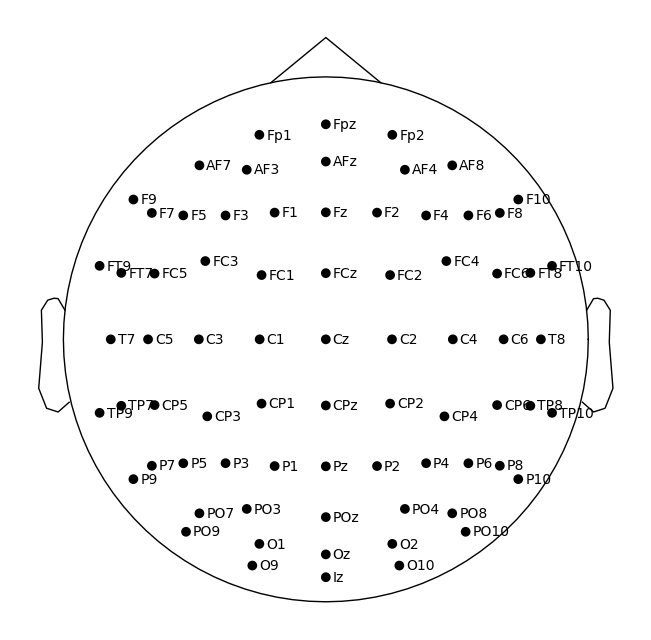

In [5]:
# followed the textbook

std_montage = mne.channels.make_standard_montage("easycap-M1")
std_montage.plot();

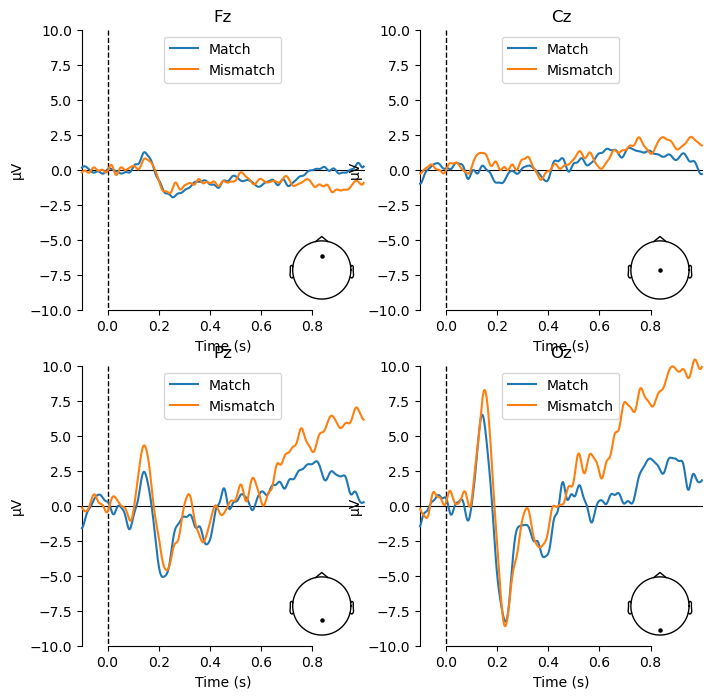

In [8]:
# followed the textbook

import matplotlib.pyplot as plt

channels = ["Fz", "Cz", "Pz", "Oz"]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds,
                                 picks=chan,
                                 ylim={"eeg":(-10, 10)},
                                 show_sensors="lower right",
                                 legend="upper center",
                                 axes=axes.reshape(-1)[idx],
                                 show=False
                                 );
plt.show()

Match


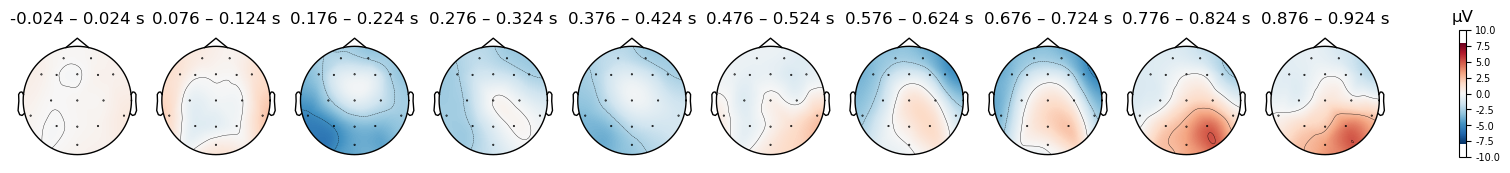

Mismatch


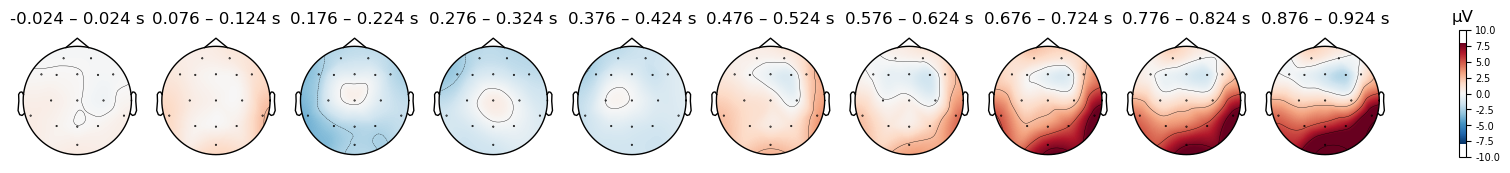

In [10]:
# followed the textbook

import numpy as np

times = np.arange(0, np.max(epochs.times), 0.1)

for condition in evokeds.keys():
    print(condition)
    evokeds[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));

In [11]:
evokeds_avgref = {c:evokeds[c].copy().set_eeg_reference(ref_channels="average")
                  for c in evokeds.keys()
                  }

----------------------------------
Match (average reference)


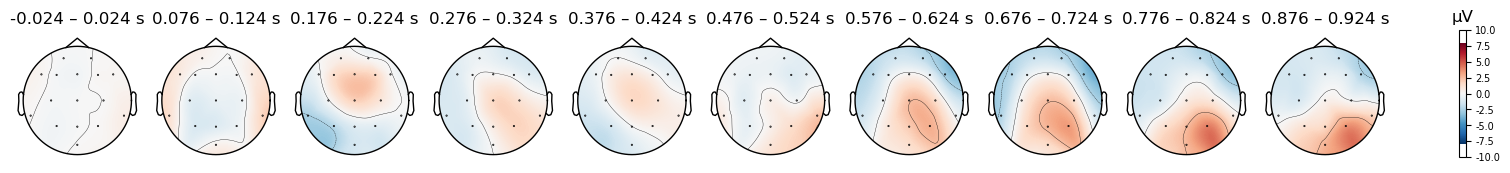

Match (original (FCz) reference)


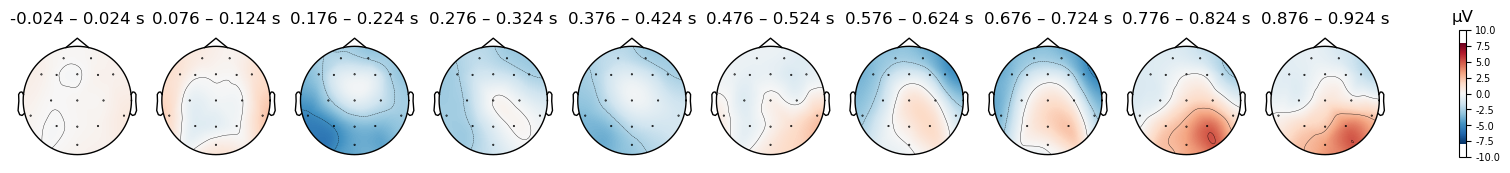

----------------------------------
Mismatch (average reference)


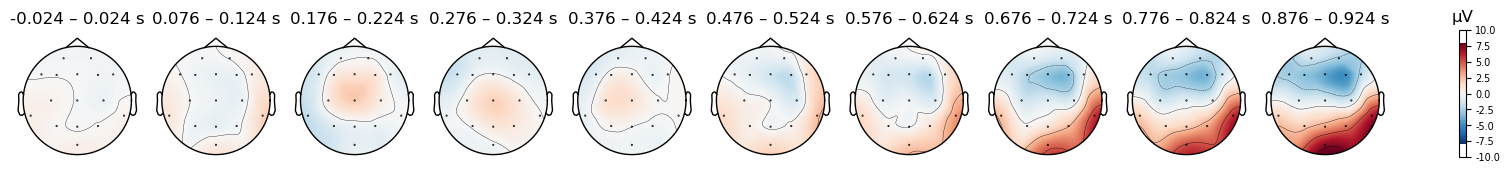

Mismatch (original (FCz) reference)


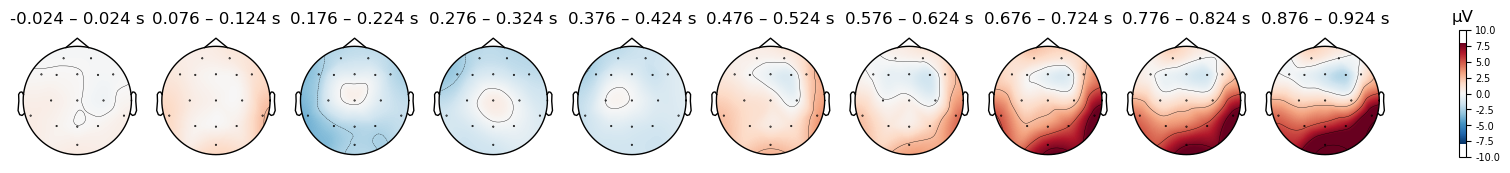

In [12]:
for condition in evokeds_avgref.keys():
    print('----------------------------------')
    print(condition + ' (average reference)')
    evokeds_avgref[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));
    
    print(condition + ' (original (FCz) reference)')
    evokeds[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));
    

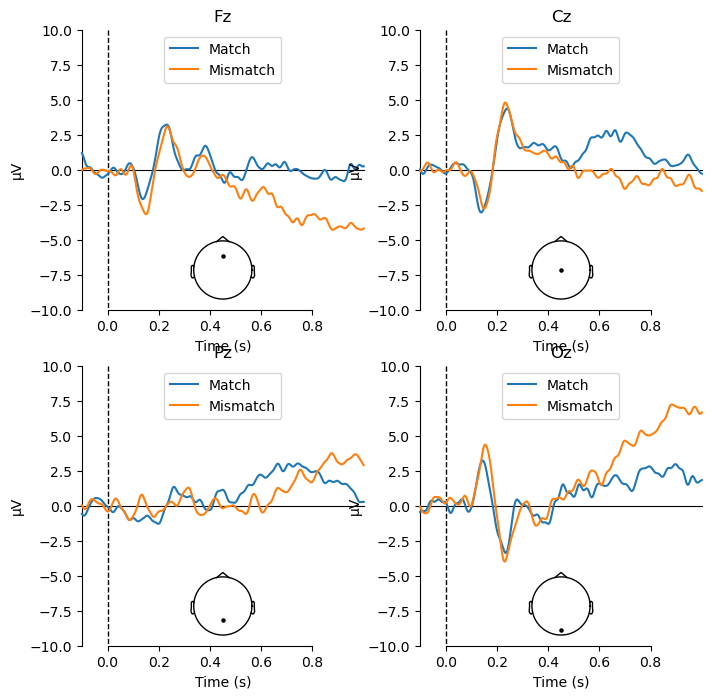

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds_avgref, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

In [14]:
evokeds_mastoidref = {c:evokeds[c].copy().set_eeg_reference(ref_channels=['TP9', 
                                                                          'TP10'
                                                                          ]
                                                            ) 
                      for c in evokeds.keys()
                      }

----------------------------------
Match (mastoid reference)


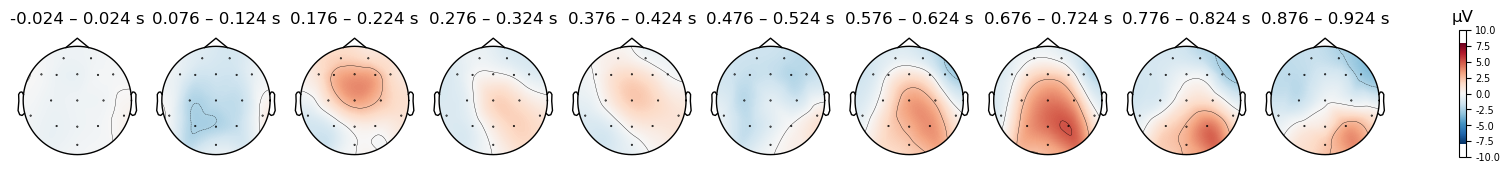

Match (average reference)


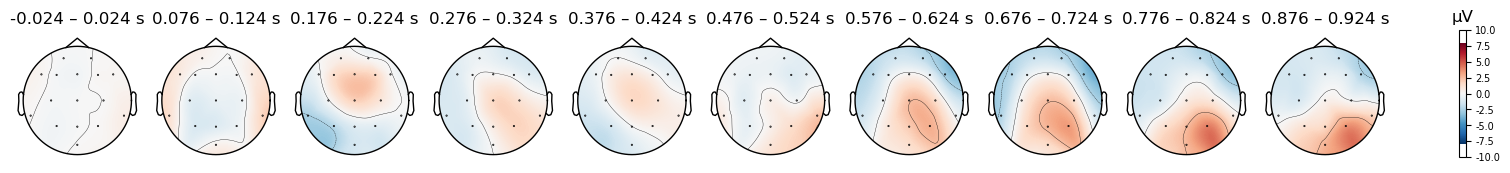

Match (original (FCz) reference)


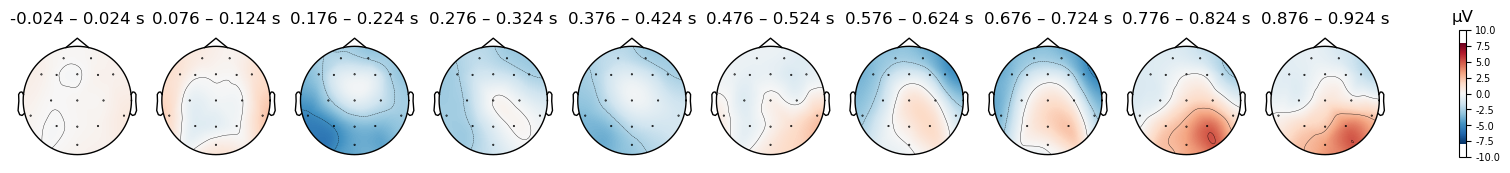

----------------------------------
Mismatch (mastoid reference)


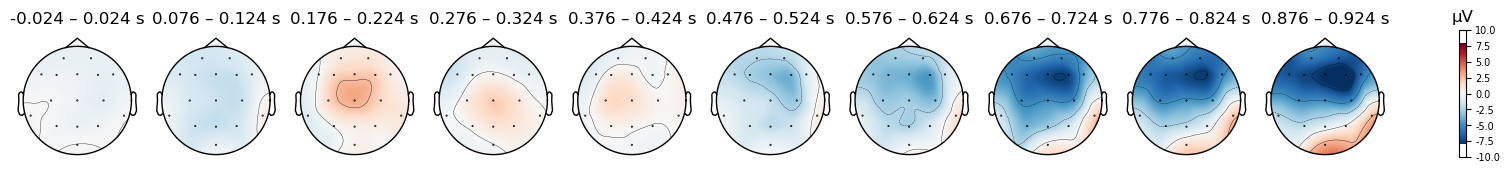

Mismatch (average reference)


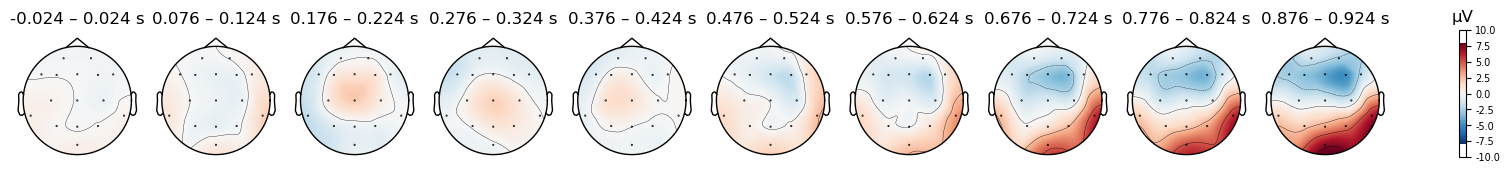

Mismatch (original (FCz) reference)


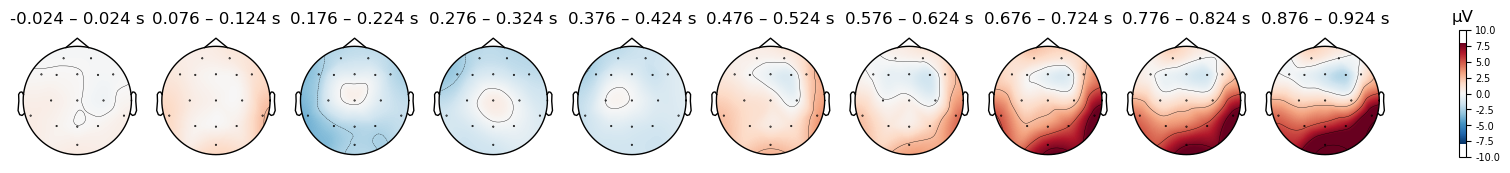

In [15]:
for condition in evokeds_mastoidref.keys():
    print('----------------------------------')    
    print(condition + ' (mastoid reference)')
    evokeds_mastoidref[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));

    print(condition + ' (average reference)')
    evokeds_avgref[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));
    
    print(condition + ' (original (FCz) reference)')
    evokeds[condition].plot_topomap(times=times, average=0.050, vlim=(-8, 8));    
    

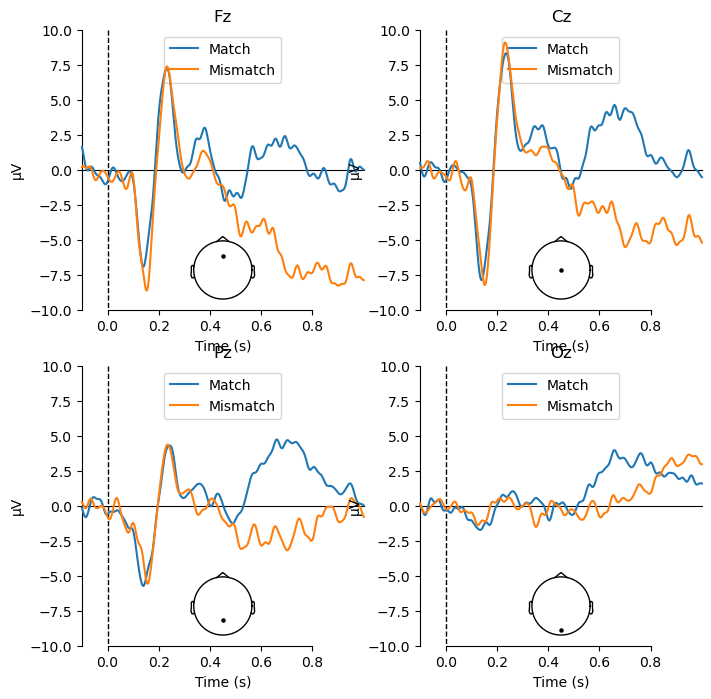

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds(evokeds_mastoidref, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

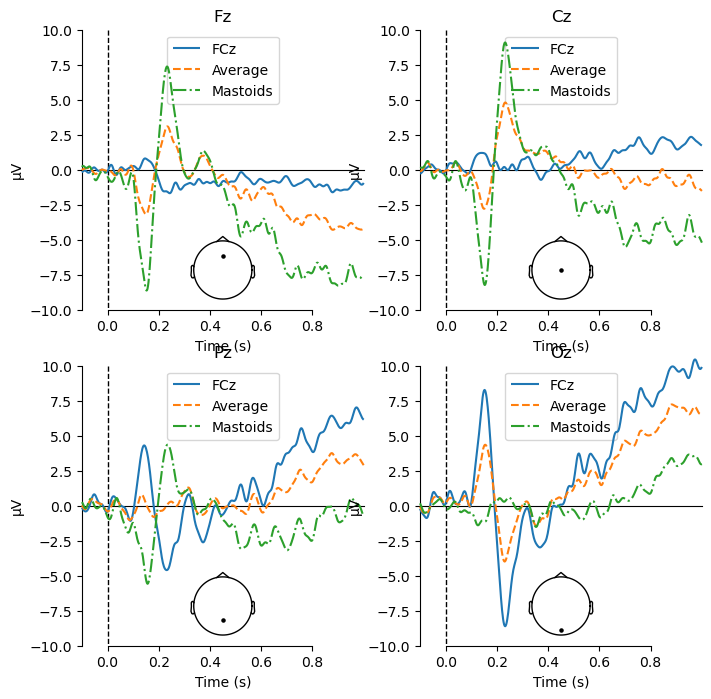

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

linestyle_dict = {'FCz':'-', 'Average':'--', 'Mastoids':'-.'}

for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds({'FCz':evokeds['Mismatch'], 
                                  'Average':evokeds_avgref['Mismatch'],
                                  'Mastoids':evokeds_mastoidref['Mismatch']
                                  }, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                linestyles=linestyle_dict,
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

The N400 can be observed as the difference between the two conditions' waveforms starting just after 400 ms. As predicted, the Mismatch waveform is more negative than the Match waveform. In most cases, the N400 lasts for about 200 ms. However, in this particular individual's data, under these task conditions, the larger negativity for Mismatch lasts until the end of the epoch.

## Saved Evoked to file

We can save Evoked objects to files using `mne.write_evokeds()`. Note that this function does not accept a dictionary as input, only a single `Evoked` object, or a list of `Evoked` objects, so below we convert the values of `evokeds` to a list using the `list()` function.

One potential source of error here is that, unlike dictionaries, lists don't have labels for their entries. So in a list of `Evoked` objects, we risk not knowing later which list item corresponds to which condition. Fortunately, MNE provides a way to label Evoked objects: the `.comment` property:

~~~python
evokeds['Match'].comment
~~~

In [24]:
evokeds_mastoidref["Match"].comment

'0.25 × Match/A + 0.25 × Match/C + 0.25 × Match/B + 0.25 × Match/D'

At the moment, this does indicate what condition the data are from, but in a somewhat messy way. Indeed, the comment there reflects the result of averaging the 4 different *Match* conditions into one `Evoked` object; the 0.25 values reflect the weighting of each condition in the average, which was based on the number of trials in each. In this case, we had equal numbers of trials of each of the four *Match* conditions, so all the weights are 25%. Since this information isn't terribly relevant now that we are treating all four conditions as the same (simply *Match*), so we can change the contents of the `.comment` property through assignment:

~~~python
for condition in evokeds.keys():
    evokeds[condition].comment = condition

evokeds
~~~

In [26]:
for condition in evokeds_mastoidref.keys():
    evokeds_mastoidref[condition].comment = condition

evokeds_mastoidref

{'Match': <Evoked | 'Match' (average, N=72), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~94 kB>,
 'Mismatch': <Evoked | 'Mismatch' (average, N=71), -0.1 – 1 s, baseline -0.1 – 0 s, 16 ch, ~94 kB>}

Now that we have comments that will help clearly identify each `Evoked` object later, we can write these out to a file. 

MNE imposes file naming conventions (rules), which specify that Evoked file names should always end in `-ave.fif`. It's good practice to use the participant ID and condition name in the file name as well. The `write_evoked()` function requires the output file name as its first argument, and the Evoked data as the second argument. 

~~~python
mne.write_evokeds('data/' + p_id + '-ave.fif', 
                  list(evokeds.values())
                 )
~~~

In [27]:
for condition in evokeds_mastoidref.keys():
    mne.write_evokeds(data_dir + p_id + '_' + condition + '-ave.fif', 
                    evokeds_mastoidref[condition],
                    overwrite=True
                    )

In [28]:
mne.write_evokeds(data_dir + p_id + '_Mismatch-Match-ave.fif', 
                    evokeds_diff_mastoidref,
                    overwrite=True
                     )

## Create difference waves 

Finally, we can create **difference waves** by subtracting the waveforms of our two experimental conditions. Since the N400 manifests as a larger negativity for mismatch, it is conventional to compute this difference as Mismatch - Match (otherwise the difference between the two would appear as positive, rather than negative, voltage). 

Computing difference waves allows us to view the experimental effect in a quite intuitive way: zero voltage means no difference between conditions, and deviation from the zero line in the waveform plot (or from white in the topopmaps) indicates an experimental effect.

MNE's `combine_evoked()` function allows us to combine Evoked data sets in different ways. To compute a difference, we pass the weights of `[1, -1]` to indicate we want to subtract the second Evoked data set listed (Match) from the first (Mismatch):

~~~python
evokeds_diff = mne.combine_evoked([evokeds['Mismatch'], evokeds['Match']], 
                                             weights=[1, -1])
evokeds_diff
~~~

In [19]:
# followed the textbook 
evokeds_diff = mne.combine_evoked([evokeds['Mismatch'], 
                                   evokeds['Match']
                                   ], 
                                  weights=[1, -1]
                                  )
    
evokeds_diff_avgref = mne.combine_evoked([evokeds_avgref['Mismatch'], 
                                   evokeds['Match']
                                   ], 
                                  weights=[1, -1]
                                  )

evokeds_diff_mastoidref = mne.combine_evoked([evokeds_mastoidref['Mismatch'], 
                                   evokeds['Match']
                                   ], 
                                  weights=[1, -1]
                                  )

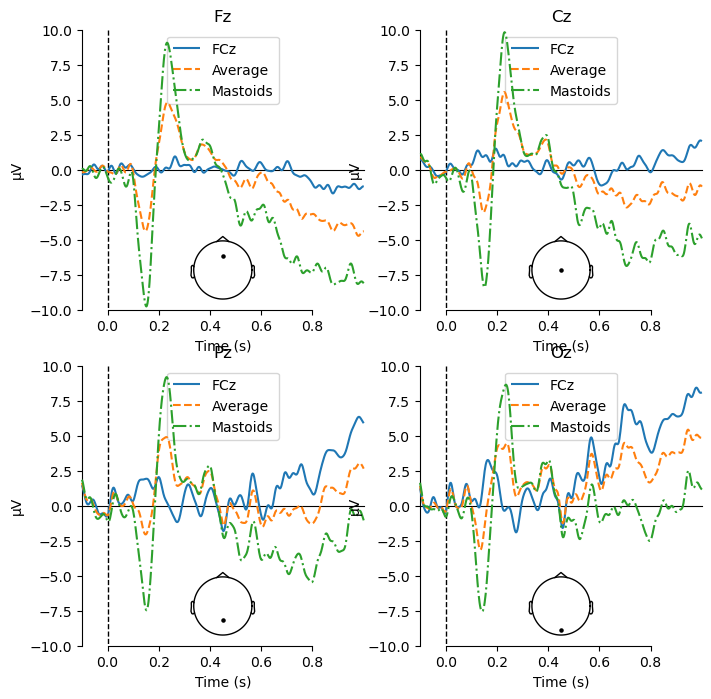

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for idx, chan in enumerate(channels):
    mne.viz.plot_compare_evokeds({'FCz':evokeds_diff, 
                                  'Average':evokeds_diff_avgref,
                                  'Mastoids':evokeds_diff_mastoidref
                                  }, 
                                picks=chan,
                                ylim={'eeg':(-10, 10)},
                                show_sensors='lower center',
                                legend='upper center',
                                linestyles=linestyle_dict,
                                axes=axes.reshape(-1)[idx],
                                show=False
                                );
plt.show()    

Mismatch (original (FCz) reference)


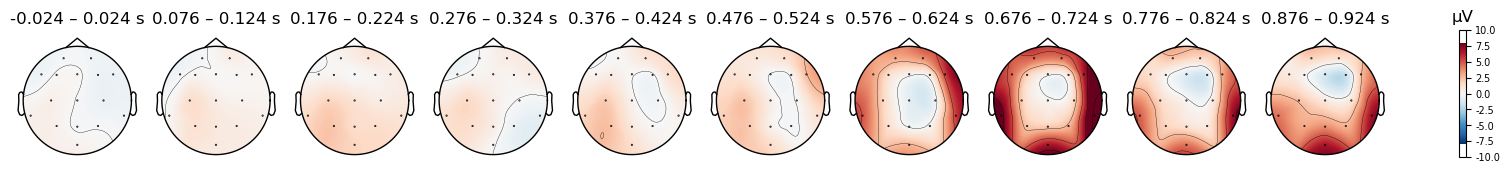

Mismatch (average reference)


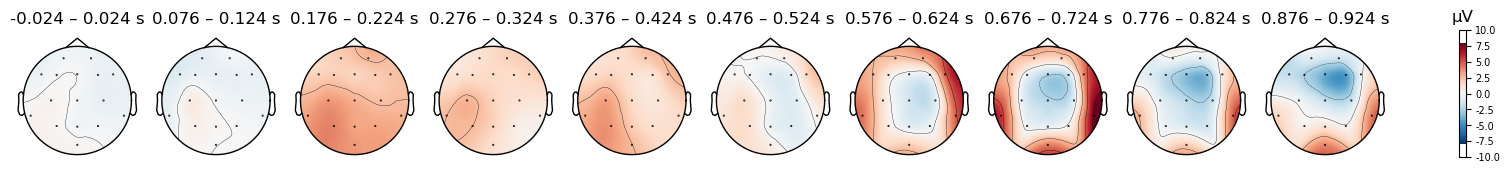

Mismatch (mastoid reference)


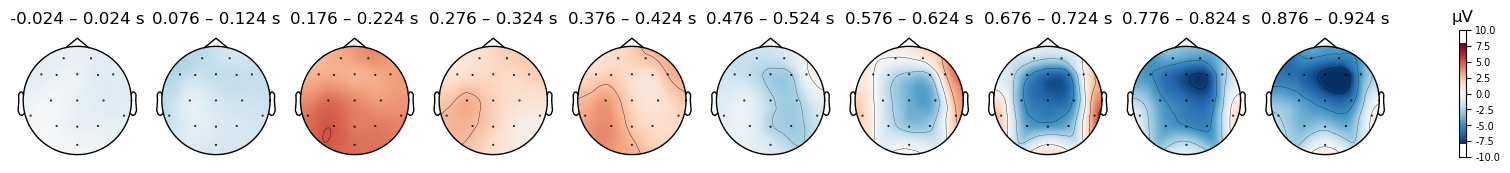

In [21]:
print(condition + ' (original (FCz) reference)')
evokeds_diff.plot_topomap(times=times, average=0.050, vlim=(-8, 8));    

print(condition + ' (average reference)')
evokeds_diff_avgref.plot_topomap(times=times, average=0.050, vlim=(-8, 8));

print(condition + ' (mastoid reference)')
evokeds_diff_mastoidref.plot_topomap(times=times, average=0.050, vlim=(-8, 8));

Having saved this as a new Evoked object, we can plot it as a waveform.

We do a few extra things to make the plot more readable:
- Whereas before we simply passed the Epochs or Evoked data to the `plot_compare_evokeds()` function, here we pass a dictionary, where the key is the label we want to appear in the legend and the value is the Evoked data
- We add a `title` kwarg to give the plot an informative title

~~~python
mne.viz.plot_compare_evokeds({'Mismatch-Match':evokeds_diff}, 
                             picks=roi, show_sensors='upper right',
                             combine='mean',
                             title='Difference Wave');
~~~

In [22]:
# Followed the textbook


One advantage of difference waves is that they make it very clear when differences are occurring between conditions, and how large they are. When we compare waveforms for two conditions, the shape of the waveforms can sometimes make it hard to mentally compute the size of the difference - especially at time points when the waveforms' amplitudes are changing. In a difference waveform plot, the zero line clearly indicates no difference between conditions, and so the magnitude of the difference — as well as its timing — is easy to see. 

And we can plot the scalp distribution of the differences as well, which nicely shows the scalp distribution of the N400:

~~~python
import numpy as np

# Specify times to plot at, as [min],[max],[stepsize]
times = np.arange(0, evokeds_diff.tmax, 0.1)
evokeds_diff.plot_topomap(times=times, average=0.050, title='Mismatch-Match');
~~~

In [23]:
# Followed the textbook

## Saving figures to files

Since MNE uses Matplotlib for its plotting duties, it is easy to save any MNE figure as an image file. The trick to doing this is to run the plotting command with the `show=False` kwarg, and then running `plt.savefig()`. The figure will still show in your notebook, but it will also be saved to the file name you specify. The extension you give the filename determines the image file format (e.g., `.png`, `.jpg`, `.pdf`, etc.)

~~~python
import matplotlib.pyplot as plt

evokeds_diff.plot_topomap(times=times, average=0.050, title='Mismatch-Match',
                          show=False)
plt.savefig('diffwave_topomaps.png')
~~~

In [ ]:
# Followed the textbook

## Summary

Preprocessing EEG data and deriving ERPs is a multi-step process. It's important to understand what each step does, why it's applied, and how to choose the correct parameters. 

There are a few additional steps that could be included in a preprocessing pipeline, that we have omitted here. For example, sometimes there there are *bad channels* — electrodes that had a poor connection throughout the recording, or were broken. There are ways to manually or automatically identify these and have them ignored throughout the preprocessing stream, and then *interpolate* data for these electrodes after artifact correction. 

After each individual participant's data has been preprocessed through a pipeline like this, the next step in analyzing an ERP experiment would be a group-level analysis. In a group-level analysis, the data from all participants would typically be averaged, and visualized using waveform plots and scalp topographic maps similar to the ones we've created here for one participant. 

As well, statistics can be applied. An important question in applying statistics to EEG data is how to handle time - do we perform statistical comparisons between conditions at every time point, or average over periods of time when ERP components occur, or include time as an additional variable in an analysis? 

One of the most common ways for ERP studies to run statistics is to average the data at each channel over a time period appropriate for the component of interest. For example, in this study a mean amplitude could be computed over the 600–800 ms time window, and then a *t*-test could be performed to compare the mean amplitude values between conditions. 